In [1]:
from openTSNE import TSNE
import pickle
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

% matplotlib inline

In [2]:
# visualization for svm's support vectors
svm = load('data/rbf_SVM.joblib')


In [3]:
# visualization for hog features

X_train_hog = np.load('data/X_train_hog.npy')
y_train = np.load('data/y_train.npy')
print(X_train_hog.shape)
print(y_train.shape)

X_test_hog = np.load('data/X_test_hog.npy')
y_test = np.load('data/y_test.npy')
print(X_test_hog.shape)
print(y_test.shape)


# # visualization for CNN
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# device = torch.device("cuda:1"if torch.cuda.is_available() else "cpu")
# print(device)

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 7)
#         self.conv3 = nn.Conv2d(16, 32, 5)
#         self.fc1 = nn.Linear(32*8*8, 600)
#         self.fc2 = nn.Linear(600, 150)
#         self.fc3 = nn.Linear(150, 18)
#         self.fc4 = nn.Linear(18, 2)
        
#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(-1, 32*8*8)
#         output = x
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x, output
    
# net = Net()
# net.to(device)
# net.load_state_dict(torch.load('data/cnn_model.pkl'))
# # Load dataset
# X_train = torch.from_numpy(np.load("data/X_train.npy") / 255.)
# X_test = torch.from_numpy(np.load("data/X_test.npy") / 255.)
# y_train = np.load("data/y_train.npy")
# y_test = np.load("data/y_test.npy")
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)
# print(X_train.dtype, y_train.dtype)
# X_train = torch.transpose(torch.transpose(X_train, 1, 3), 2, 3)
# X_test = torch.transpose(torch.transpose(X_test, 1, 3), 2, 3)

# X_train_feature = None
# X_test_feature = None
# batchsize = 256
# for i in range(0, len(X_train), batchsize):
#     x = X_train[i:i+batchsize]
#     x = x.to(device)
#     _, a = net(x.float())
#     if X_train_feature is None:
#         X_train_feature = a.cpu().detach().numpy()
#     else:
#         X_train_feature = np.concatenate((X_train_feature, a.cpu().detach().numpy()), axis=0)
# print(X_train_feature.shape)
# for i in range(0, len(X_test), batchsize):
#     x = X_test[i:i+batchsize]
#     x = x.to(device)
#     _, a = net(x.float())
#     if X_test_feature is None:
#         X_test_feature = a.cpu().detach().numpy()
#     else:
#         X_test_feature = np.concatenate((X_test_feature, a.cpu().detach().numpy()), axis=0)
# print(X_test_feature.shape)


(20680, 900)
(20680,)
(5203, 900)
(5203,)


In [4]:
tsne = TSNE(
    n_components=2, perplexity=30, learning_rate=200,
    n_jobs=10, initialization="pca", metric="euclidean",
    early_exaggeration_iter=250, early_exaggeration=12, n_iter=750,
    neighbors="exact", negative_gradient_method="bh",
)
tsne_test = TSNE(
    n_components=2, perplexity=30, learning_rate=200,
    n_jobs=10, initialization="pca", metric="euclidean",
    early_exaggeration_iter=250, early_exaggeration=12, n_iter=750,
    neighbors="exact", negative_gradient_method="bh",
)

In [5]:
import time

t_start = time.time()
embedding = tsne.fit(X_train_hog)
print(embedding.shape)

embedtest = tsne_test.fit(X_test_hog)
print(embedtest.shape)
t_end = time.time()
print("cost time: {}s".format(t_end - t_start))

(20680, 2)
(5203, 2)
cost time: 269.609011888504s


752 0.4576993304930006
3384 15653 1643


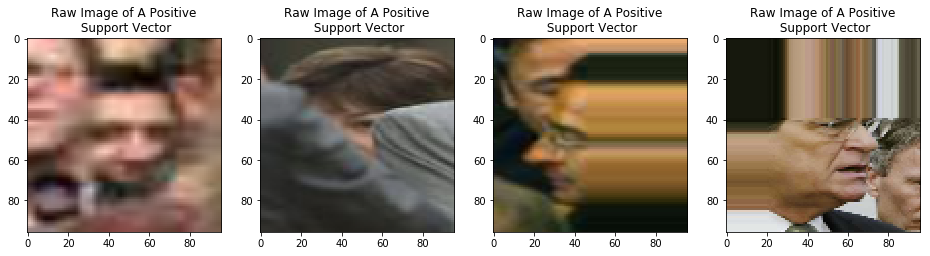

In [24]:
import cv2
y_train = np.load('data/y_train.npy')
raw_X = np.load('data/X_train.npy')
raw_img1 = cv2.cvtColor(raw_X[108], cv2.COLOR_BGR2RGB)
raw_img2 = cv2.cvtColor(raw_X[110], cv2.COLOR_BGR2RGB)
raw_img3 = cv2.cvtColor(raw_X[13439], cv2.COLOR_BGR2RGB)
raw_img4 = cv2.cvtColor(raw_X[13440], cv2.COLOR_BGR2RGB)
svm_visual = True
if svm_visual:
    count = 0
    for index in svm.support_:
        if y_train[index]==1:
            count += 1
#             print(index)
        y_train[index] = 0
    print(count,count/len(svm.support_))
    p = []
    n = []
    s = []
    for i in range(embedding.shape[0]):
        if y_train[i] == 0:
            s.append(embedding[i])
        elif y_train[i] == 1:
            p.append(embedding[i])
        elif y_train[i] == -1:
            n.append(embedding[i])
    print(len(p), len(n), len(s))
    n = np.array(n)
    p = np.array(p)
    s = np.array(s)
    plt.figure(figsize=(16,4))
    plt.subplot(1, 4, 1)
#     plt.scatter(n[:,0], n[:,1], s=0.5, alpha=0.8, label='Nagative Samples')
#     plt.scatter(p[:,0], p[:,1], s=0.5, alpha=0.8, label='Positive Samples')
#     plt.scatter(s[:,0], s[:,1], s=1, alpha=0.8, color='r', label='Support Vectors')
    plt.imshow(raw_img1)
    plt.title('Raw Image of A Positive\n Support Vector')
#     plt.legend(loc = 'upper right')
    plt.subplot(1, 4, 2)
    plt.imshow(raw_img2)
    plt.title("Raw Image of A Positive\n Support Vector")
    plt.subplot(1, 4, 3)
    plt.imshow(raw_img3)
    plt.title("Raw Image of A Positive\n Support Vector")
    plt.subplot(1, 4, 4)
    plt.imshow(raw_img4)
    plt.title("Raw Image of A Positive\n Support Vector")
    plt.savefig('data/visual/report_use/positive_support_vector.jpg')
        

In [5]:
positive = []
negative = []
for i in range(embedding.shape[0]):
    if y_train[i]>0:
        positive.append(embedding[i])
    else:
        negative.append(embedding[i])
positive = np.array(positive)
negative = np.array(negative)
print(positive.shape, negative.shape)

positive_test = []
negative_test = []
for i in range(embedtest.shape[0]):
    if y_test[i]>0:
        positive_test.append(embedtest[i])
    else:
        negative_test.append(embedtest[i])
positive_test = np.array(positive_test)
negative_test = np.array(negative_test)
print(positive_test.shape, negative_test.shape)

(4136, 2) (16544, 2)
(1035, 2) (4168, 2)


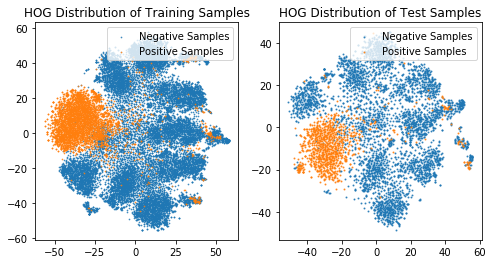

In [6]:
plt.figure(figsize=(8,4))
plt.subplot(1,2, 1)
plt.scatter(negative[:,0], negative[:,1], s=0.5, alpha=0.8, label='Negative Samples')
plt.scatter(positive[:,0], positive[:,1], s=0.5, alpha=0.8, label='Positive Samples')
plt.title("HOG Distribution of Training Samples")
plt.legend(loc = 'upper right')
plt.subplot(1, 2, 2)
plt.scatter(negative_test[:,0], negative_test[:,1], s=1, alpha=0.8, label='Negative Samples')
plt.scatter(positive_test[:,0], positive_test[:,1], s=1, alpha=0.8, label='Positive Samples')
plt.title("HOG Distribution of Test Samples")
plt.legend(loc = 'upper right')
# plt.show()
plt.savefig('data/visual/report_use/hog_distribution.jpg')